In [7]:
# Step 1: Import Pandas
import pandas as pd

# Step 2: Read CSV File
df = pd.read_csv(r'C:\Users\vinny\Desktop\data.csv')


# Step 3: View the Data
print(df.head())  # This will display the first few rows of the DataFrame


         date    id  sku_id  price                             sku_name  \
0  24-05-2020   400       0    1.9  jeans_female_brand_2_P_middle_sport   
1  24-05-2020   800       0    1.9  jeans_female_brand_2_P_middle_sport   
2  24-05-2020  1200       0    1.9  jeans_female_brand_2_P_middle_sport   
3  24-05-2020  1600       0    1.9  jeans_female_brand_2_P_middle_sport   
4  24-05-2020  2000       0    1.9  jeans_female_brand_2_P_middle_sport   

   gender category    brand collection price_tier  style   cost  sales  
0  female    jeans  brand_2          P     middle  sport  43.63  577.0  
1  female    jeans  brand_2          P     middle  sport  43.63  545.0  
2  female    jeans  brand_2          P     middle  sport  43.63  565.0  
3  female    jeans  brand_2          P     middle  sport  43.63  536.0  
4  female    jeans  brand_2          P     middle  sport  43.63  568.0  


Number of unique items: 400


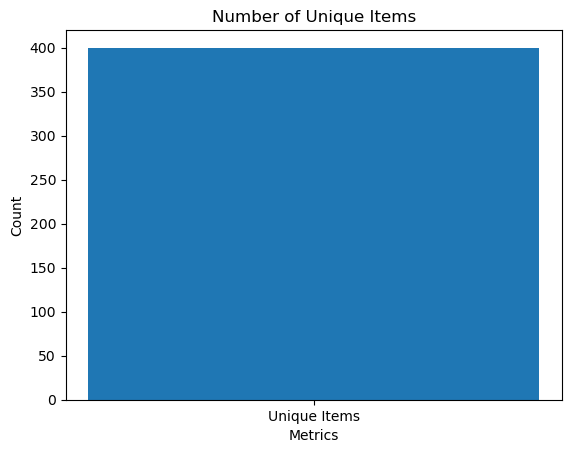

In [7]:
#q1 # number of unique items 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv(r'C:\Users\vinny\Desktop\data.csv')

# Calculate number of unique items
num_unique_items = data['sku_id'].nunique()
print("Number of unique items:", num_unique_items)
# Plot a bar chart for the number of unique items
plt.bar(['Unique Items'], [num_unique_items])
plt.xlabel('Metrics')
plt.ylabel('Count')
plt.title('Number of Unique Items')
plt.show()


In [9]:
#q2 #mean and standard deviation for each item in both price and sold quantities
# Load data
data = pd.read_csv(r'C:\Users\vinny\Desktop\data.csv')

# Calculate mean and standard deviation for each item in price and sold quantities
item_stats = data.groupby('sku_id').agg({'price': ['mean', 'std'], 'sales': ['mean', 'std']})
print("Mean and standard deviation for each item in both price and sold quantities:")
print(item_stats)


Mean and standard deviation for each item in both price and sold quantities:
           price                  sales            
            mean       std         mean         std
sku_id                                             
0       1.880952  0.420597   688.200000  499.907794
1       1.897619  0.318099   350.978571  252.640692
2       1.873810  0.496439   517.050000  400.243673
3       1.697619  0.358291  1221.188095  641.428310
4       1.685714  0.420219   674.100000  354.042794
...          ...       ...          ...         ...
395     1.759524  0.417079   740.464286  524.422361
396     1.814286  0.356345   834.795238  579.579533
397     1.857143  0.324522   633.223810  487.006126
398     1.628571  0.341105   699.464286  293.882100
399     1.916667  0.387965   612.735714  468.934225

[400 rows x 4 columns]


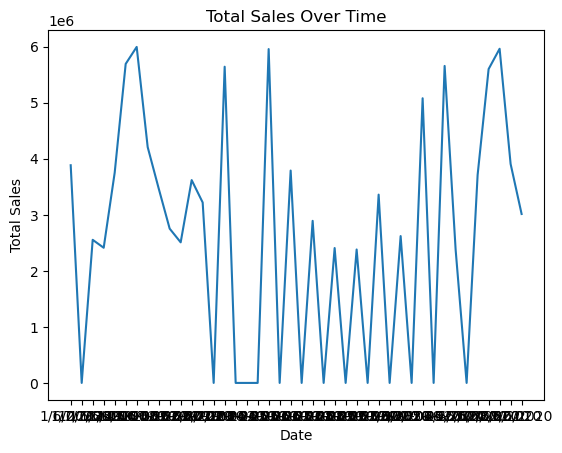

In [4]:
#q3 #Are the sales affected by the date? Why? Provide charts and statistics supporting your conclusion
# Load data
data = pd.read_csv(r'C:\Users\vinny\Desktop\data.csv')

# Visualize total sales over time
sales_by_date = data.groupby('date')['sales'].sum()
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.show()



In [6]:
import statsmodels.api as sm

def RecommendPrice(itemID, data, Date):
    # Filter data for the specified itemID and Date
    filtered_data = data[(data['sku_id'] == itemID) & (data['date'] == Date)]
    
    # Perform OLS regression
    X = sm.add_constant(filtered_data['price']) # Add constant term
    y = filtered_data['sales']
    model = sm.OLS(y, X)
    
    try:
        model_fit = model.fit()
        intercept, slope = model_fit.params
        
        # Calculate price for maximum profit (e.g., where derivative = 0)
        optimal_price = -intercept / (2 * slope)
        
        return optimal_price, model_fit.summary()
    
    except Exception as e:
        print("Error occurred during model fitting:", e)
        return None, None

# Example of recommending price for a specific item and date
recommend_price, summary = RecommendPrice(0, data, '24-05-2020')
if recommend_price is not None:
    print("Recommended price:", recommend_price)
    print(summary)
else:
    print("Failed to recommend price.")


Error occurred during model fitting: not enough values to unpack (expected 2, got 1)
Failed to recommend price.
